In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
import pandas as pd
from nltk.stem.porter import PorterStemmer

In [2]:
data=pd.read_csv(r'C:\Users\kurre\OneDrive\Desktop\DATA SCIENCE DOCS\datasets\Movie_Review_NLP.csv')

In [3]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.values[0]

array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

### Text Preprocessing

sentiment
negative    25000
positive    25000
Name: count, dtype: int64


<Axes: xlabel='sentiment'>

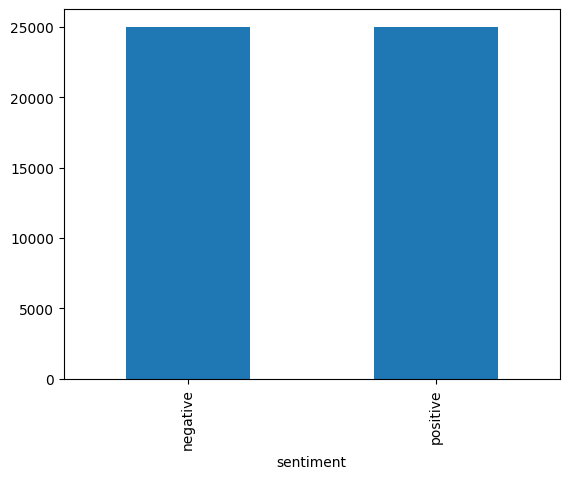

In [6]:
print(data.value_counts('sentiment'))
data.value_counts('sentiment').plot(kind='bar')

In [7]:
map_dict={'positive':1,
         'negative':0}

data['sentiment_numeric']= data.sentiment.map(map_dict)
data.head()

,review,sentiment,sentiment_numeric
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [8]:
## Preprocessing Function

ps= PorterStemmer()
corpus= set()
def preprocess(text):
    
    ## Removing unwanted space
    text= text.strip()
    
    ## Removing html tags
    text= re.sub('<[^>]*>',"",text)
    
    ## Removing any Numerical Values
    text= re.sub('[^a-zA-Z]',' ', text)
    
    ## Lower case the word
    text= text.lower()
    
    text= text.split()
    
    
    ## stemming the word for sentiment analysis do not remove the stop word
    text= [ps.stem(word) for word in text]
    text= ' '.join(text)
    return text

In [9]:
data['Preprocessed_review']= data.review.apply(preprocess)

In [10]:
data.head()

,review,sentiment,sentiment_numeric,Preprocessed_review
0,One of the other reviewers has mentioned that ...,positive,1,one of the other review ha mention that after ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonder littl product the film techniqu is ve...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought thi wa a wonder way to spend time on...
3,Basically there's a family where a little boy ...,negative,0,basic there s a famili where a littl boy jake ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei s love in the time of money is a...


In [11]:
data.shape

(50000, 4)

**Convert text to vectors**

In [12]:
### performing train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.Preprocessed_review,
                                                 data.sentiment_numeric,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=data.sentiment_numeric)

In [13]:
#x_train.shape, x_test.shape

In [14]:
# Tf-idf

tf_idf= TfidfVectorizer()
tf_idf.fit(x_train)

TfidfVectorizer()

In [15]:
#applying tf idf to training data

X_train_tf = tf_idf.fit_transform(x_train)
X_train_tf

<40000x63999 sparse matrix of type '<class 'numpy.float64'>'
	with 5236071 stored elements in Compressed Sparse Row format>

In [16]:
X_train_tf.shape

(40000, 63999)

In [17]:
len(tf_idf.vocabulary_)

63999

In [18]:
len(y_train)

40000

In [19]:
len(y_test)

10000

In [20]:
X_train_tf[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [21]:
#applying tf idf to training data

X_test_tf= tf_idf.transform(x_test)

### Model Devlopment

In [22]:
#  Naive bayes classifier

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf,y_train)

MultinomialNB()

In [23]:
#predicted y

y_pred = naive_bayes_classifier.predict(X_test_tf)

In [24]:
print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.84      0.88      0.86      5000
    Negative       0.87      0.84      0.85      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [25]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[4399  601]
 [ 823 4177]]


In [26]:
# Doing test prediction
[x_test.values[0]]

['ye mtv there realli is a way to market daria what start as a clever teenag angst comment on everyth that suck and make the viewer feel better about their sucki teenag life sitcom now mutat into a how you should deal with your problem charad i use to watch daria all the time and love it now sit here after watch the so call movi i can onli wonder what the point of thi all wa daria tell us how to lead out life in colleg excus me didn t the point daria made everi episod that what you like to do is ok as long as it is ok with yourself no matter what the rest of the sick sad world think of it thi entir thing remind me of the scene in realiti bite the movi channel show the documentri for the first time']

In [27]:
test_processed=preprocess(x_test.values[0])

In [28]:
test_input = tf_idf.transform([test_processed])

In [29]:
#0= bad review
#1= good review

res=naive_bayes_classifier.predict(test_input)[0]

if res==1:
    print("Good Review")
    
elif res==0:
    print("Bad Review")

Bad Review


In [30]:
y_test

18870    0
39791    0
30381    1
42294    0
33480    0
        ..
3634     0
47910    0
16086    0
48294    1
4478     0
Name: sentiment_numeric, Length: 10000, dtype: int64

In [45]:
### Testing all together

review=['Movie is good']
test_processed=preprocess(review[0])
test_input = tf_idf.transform([test_processed])

#0= bad review
#1= good review

res=naive_bayes_classifier.predict(test_input)[0]

if res==0:
    print("Good Review")
    
elif res==1:
    print("Bad Review")

Good Review


In [54]:
### Testing all together

review=['Movie is not so good']
test_processed=preprocess(review[0])
test_input = tf_idf.transform([test_processed])

#0= bad review
#1= good review

res=naive_bayes_classifier.predict(test_input)[0]

if res==0:
    print("Good Review")
    
elif res==1:
    print("Bad Review")

Good Review


In [61]:
review = ['Movie is so good']
test_processed = preprocess(review[0])
test_input = tf_idf.transform([test_processed])

# 0 = bad review
# 1 = good review

res = naive_bayes_classifier.predict(test_input)[0]

if res == 0:
    print("Bad Review")
elif res == 1:
    print("Good Review")


Bad Review


In [59]:
import numpy as np
import vectorize
x_test='movie is so bad'
x_test=preprocess(x_test)
x_test=np.array([vectorize(x_test)])
clf.print(x_test)

ModuleNotFoundError: No module named 'vectorize'